# Worksheet:  Tasks for Interview process for Wink Reports

Candidate:  Mike Speer

In [2]:
#Initialize pandas and import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

In [3]:
df = pd.read_csv('/Users/mspeer/projects/wink_reports/implementationengineer_task_copy.csv')

### 1)  Answer question "What is my profit margin per product?":

In [4]:
#Calculate a new column for profit margin based on difference of price and cost
df['Profit Margin'] = df['Product Price'] - df['Product Cost']

In [122]:
#Create a unique list of products by dropping duplicates and sorting in descending order
df_pm = df.drop_duplicates(subset=['Product Name'])
df_pm[['Product Name','Product Cost','Product Price','Profit Margin']].sort_values(by='Profit Margin', ascending=False)

,Product Name,Product Cost,Product Price,Profit Margin
59,Copy Centre CC200 Copier/Printer/Scanner,1091.00,2800.00,1709.00
6,Copy Centre CC50 Copier,728.00,999.00,271.00
1,"Toner Cartridge, Three Colour",81.00,192.00,111.00
17,"Toner Cartridge, Black",66.00,162.00,96.00
9,"A4 Copy Paper, 120gsm Gloss, 500 sheets",8.82,17.99,9.17
0,"A4 Copy Paper, 200gsm Silk Premium, 500 sheets",20.05,26.50,6.45
2,"A4 Copy Paper, 80gsm, 500 sheets",3.27,4.99,1.72


### 2)  Answer question "Who is my best customer?":

In [6]:
#copy original dataframe for (b)est (c)ustomer analysis
df_bc = df

#### Based on sum total of sales by customer for given time frame:

In [7]:
#Create new working dataset grouped by customer name and sorted by total sales descending
df_bc_1 = df_bc[['Customer Name','Total Amount']].groupby('Customer Name').sum().sort_values(by='Total Amount', ascending=False)
df_bc_1

,Total Amount
Customer Name,
Viviyan Pearson,88492.32
Hyacinthe Cammish,79240.53
Amos Henighan,72957.27
Kenton Slaten,70928.78
Austin Stirtle,66325.30
Rickey Stickins,63074.17
Erin Heselwood,62026.51
Kaleb de Savery,58463.05
Corey Sante,55034.35


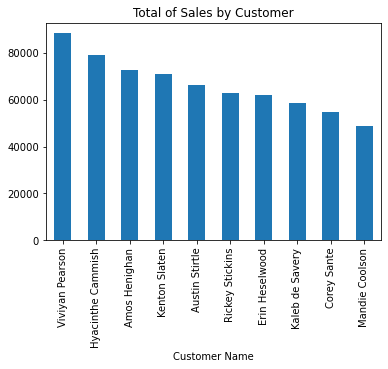

In [8]:
#Generate data plot
ax = df_bc_1.plot.bar(rot=90, legend=False, title="Total of Sales by Customer")

#### Based on total number of transactions per person for given time frame:

In [9]:
#Create new working dataset grouped by customer name and sorted by number of transactions descending
df_bc_2=df_bc[['Customer Name','Total Amount']].groupby('Customer Name').count().sort_values(by='Total Amount', ascending=False)
df_bc_2

,Total Amount
Customer Name,
Kenton Slaten,323
Mandie Coolson,301
Viviyan Pearson,299
Corey Sante,289
Rickey Stickins,287
Amos Henighan,279
Austin Stirtle,279
Hyacinthe Cammish,279
Erin Heselwood,276


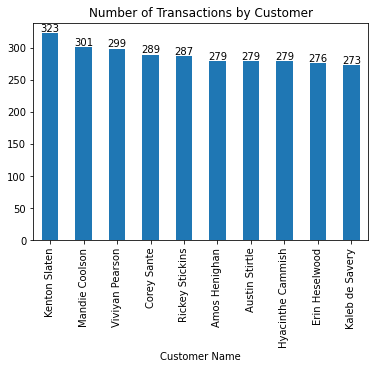

In [10]:
#Generate data plot
ax = df_bc_2.plot.bar(rot=90, legend=False, title="Number of Transactions by Customer")
ax.bar_label(ax.containers[0]);

#### Consider sales based on region:

In [11]:
#Create new working dataset grouped by country and sorted by total sales descending
df_bc_3 =df_bc[['Customer Country','Total Amount']].groupby('Customer Country').sum().sort_values(by='Total Amount', ascending=False)
df_bc_3

,Total Amount
Customer Country,
China,143886.05
Indonesia,88492.32
Finland,79240.53
Bulgaria,66325.30
Sri Lanka,63074.17
Poland,62026.51
Portugal,58463.05
Australia,55034.35
Thailand,48866.03


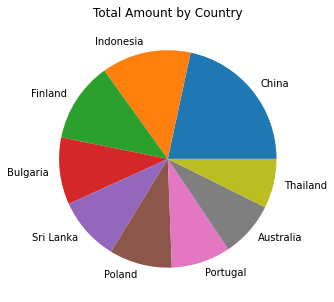

In [12]:
#Generate data plot
plot = df_bc_3.plot.pie(y='Total Amount', ylabel='', figsize=(5, 5), legend=False, title="Total Amount by Country")

In [123]:
#group best customer dataframe on country and customer sorted by total amount descending
df_bc[['Customer Country','Customer Name','Total Amount']].groupby(['Customer Country','Customer Name']).sum().sort_values(by='Total Amount', ascending=False)

Total Amount
Customer Country Customer Name                  
Indonesia        Viviyan Pearson        88492.32
Finland          Hyacinthe Cammish      79240.53
China            Amos Henighan          72957.27
                 Kenton Slaten          70928.78
Bulgaria         Austin Stirtle         66325.30
Sri Lanka        Rickey Stickins        63074.17
Poland           Erin Heselwood         62026.51
Portugal         Kaleb de Savery        58463.05
Australia        Corey Sante            55034.35
Thailand         Mandie Coolson         48866.03

### 3)  Answer question "How is my business doing? Why do you say so?":

#### High level view.  Overall sales by month aggregating subtotal amount for line item transaction

Approach is to order and resample the data based on a 4 week frequency.

In [13]:
#convert Date column to python date format:
df['Date']= pd.to_datetime(df['Date'])
df_tl = df[['Date','Subtotal Amount']].sort_values(by='Date', ascending=True)

In [124]:
#resample data on 1 month interval
df_tl_rs = df_tl.resample('M', on='Date').sum()
df_tl_rs

,Subtotal Amount
Date,
2016-01-31,1595.10
2016-02-29,237.89
2016-03-31,1414.70
2016-04-30,1463.24
2016-05-31,4150.67
...,...
2022-08-31,10261.60
2022-09-30,17718.47
2022-10-31,7270.85


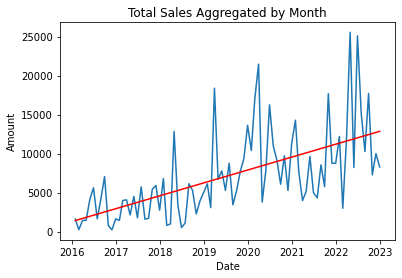

In [18]:
# Calculate trendline
x_date = df_tl_rs.index
x_num = dates.date2num(x_date)
trend_line = np.polyfit(x_num, df_tl_rs['Subtotal Amount'], 1)
fit = np.poly1d(trend_line)
plt.plot(x_date, df_tl_rs['Subtotal Amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Total Sales Aggregated by Month')
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r")
plt.show()

#### Consider sales by product per month.

In [19]:
#Generate sorted working dataframe for product sales analysis:
df_mp_tl = df[['Date','Product Name','Product Category','Subtotal Amount']].sort_values(by='Date', ascending=True)

In [78]:
#modify column header names to be python friendly:
df_mp_tl.columns = df_mp_tl.columns.str.replace(' ','_')

In [82]:
#Resample data for 4 week bins and group for summary subtotal:
df_mp_tl_rs = df_mp_tl.groupby([pd.Grouper(key='Date', freq='M'), 'Product_Category']).Subtotal_Amount.sum()
df_mp_tl_rs

Date        Product_Category
2016-01-31  Ink                  698.81
            Paper                896.29
2016-02-29  Paper                237.89
2016-03-31  Ink                  606.14
            Paper                808.56
                                 ...   
2022-11-30  Paper               2492.78
            Printer             5217.30
2022-12-31  Ink                 2267.42
            Paper               2601.21
            Printer             3419.10
Name: Subtotal_Amount, Length: 226, dtype: float64

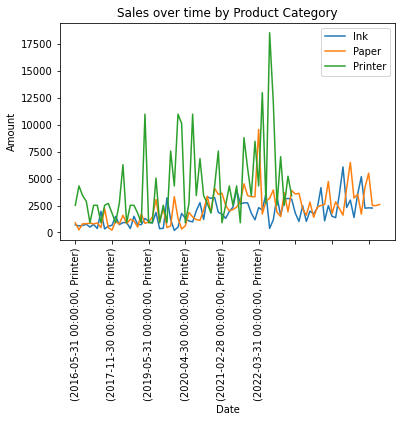

In [149]:
#Plot trend of all products by category
df_mp_tl_rs_gpd = df_mp_tl_rs.groupby('Product_Category')
ax = df_mp_tl_rs_gpd.plot(kind='line', title='Sales over time by Product Category',xlabel="Date",ylabel="Amount",legend='Product_Category',rot=90)

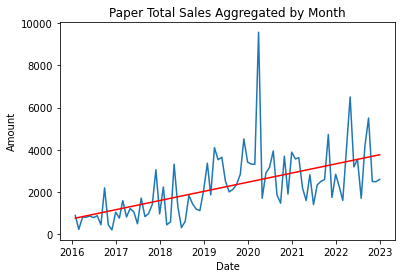

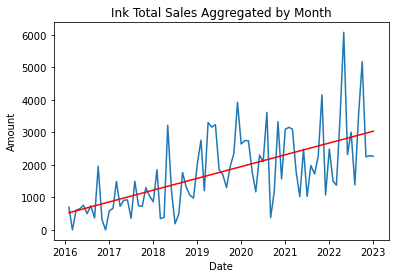

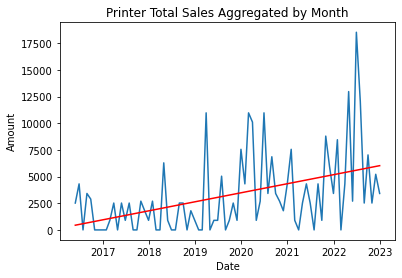

In [111]:
unique_prod_cat = df_mp_tl['Product_Category'].unique()
#print(df_mp_tl)
for prod_cat in unique_prod_cat:
    #print(prod_cat)
    df_cat = df_mp_tl[df_mp_tl.Product_Category == prod_cat]
    df_cat_rs=df_cat.resample('M', on='Date').sum()
    #print(df_cat_rs)
    x_date = df_cat_rs.index
    x_num = dates.date2num(x_date)
    trend_line = np.polyfit(x_num, df_cat_rs['Subtotal_Amount'],1)
    fit = np.poly1d(trend_line)
    plt.plot(x_date, df_cat_rs['Subtotal_Amount'])
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(prod_cat + ' Total Sales Aggregated by Month')
    x_fit=np.linspace(x_num.min(), x_num.max())
    plt.plot(dates.num2date(x_fit), fit(x_fit), "r")
    plt.show()

### Bonus)  Answer question "How much stock do I need to keep on hand of each product?":

Approach is to resample time data using a 2 week interval to comprehend lead time and base inventory decision on the cummulative amount of each item sold in the 2 week bin.

In [77]:
#Create new dataframe for time analysis of product sales:
df_prod_tl = df[['Date','Product SKU','Line Quantity']].sort_values(by='Date', ascending=True)
df_prod_tl.columns = df_prod_tl.columns.str.replace(' ','_')
print("Unique prod list:",df_prod_tl['Product_SKU'].unique())

Unique prod list: ['PA4-200-SILK' 'INK-BLA' 'PA4-120' 'PA4-80' 'INK-TRIC' 'CC200' 'CC50']


In [75]:
df_prod_tl

,Date,Product_SKU,Line_Quantity
70,2016-01-11,PA4-200-SILK,3
428,2016-01-13,INK-BLA,1
362,2016-01-13,PA4-120,2
470,2016-01-22,PA4-120,1
648,2016-01-23,PA4-80,1
...,...,...,...
2879,2022-12-22,PA4-80,1
2882,2022-12-24,INK-TRIC,2
2883,2022-12-24,PA4-120,1
2881,2022-12-24,PA4-200-SILK,1


PA4-200-SILK Line_Quantity    19
dtype: int64
INK-BLA Line_Quantity    8
dtype: int64
PA4-120 Line_Quantity    14
dtype: int64
PA4-80 Line_Quantity    20
dtype: int64
INK-TRIC Line_Quantity    10
dtype: int64
CC200 Line_Quantity    5
dtype: int64
CC50 Line_Quantity    3
dtype: int64


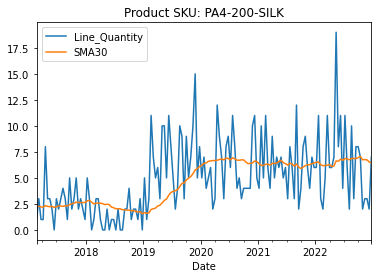

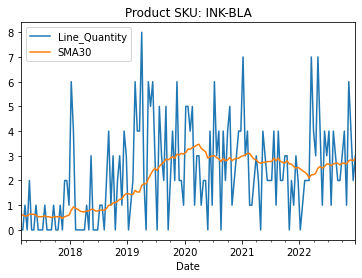

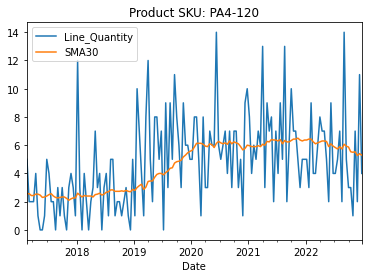

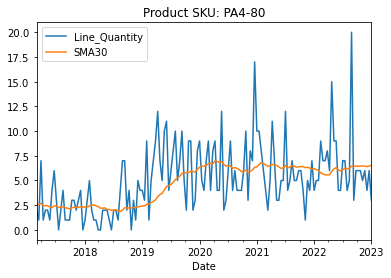

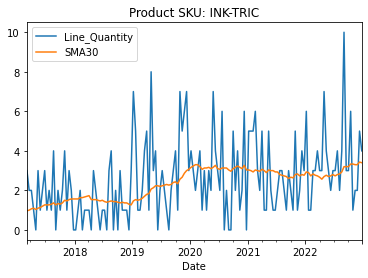

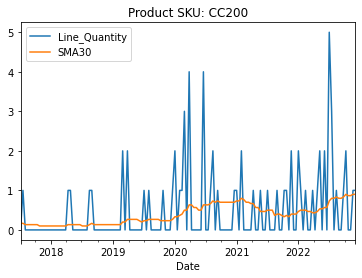

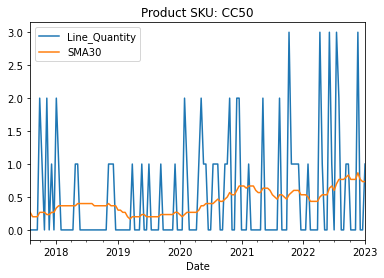

In [167]:
#Iterate product dataframe on unique sku and resample on 2 week interval, generating sum on Line_Quantity
#Overlay window of 30 simple moving average
#Note:  click in output cell to scroll through content
for prod in unique_prod:
    df_sku = df_prod_tl[df_prod_tl.Product_SKU == prod]
    df_sku_rs = df_sku.resample('2W', on='Date').sum()
    print(prod,df_sku_rs.max())
    sma = df_sku_rs['Line_Quantity'].to_frame()
    sma['SMA30'] = sma['Line_Quantity'].rolling(30).mean()
    sma.dropna(inplace=True)
    sma.plot(title='Product SKU: ' + prod)

#### Appendix:  View of overall dataset:

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2885 non-null   int64         
 1   Date                      2885 non-null   datetime64[ns]
 2   Customer Name             2885 non-null   object        
 3   Product Name              2885 non-null   object        
 4   Line Quantity             2885 non-null   int64         
 5   Line Total Amount         2885 non-null   float64       
 6   Customer Address          2885 non-null   object        
 7   Customer City             2885 non-null   object        
 8   Customer Country          2885 non-null   object        
 9   Customer Email            2885 non-null   object        
 10  Customer Phone No         2885 non-null   object        
 11  Line Number               2885 non-null   int64         
 12  Line Tax Amount     

In [435]:
df

,id,Date,Customer Name,Product Name,Line Quantity,Line Total Amount,Customer Address,Customer City,Customer Country,Customer Email,...,Product Cost,Product Price,Product Quantity On Hand,Product SKU,Shipped Date,Status,Subtotal Amount,Tax Amount,Total Amount,Profit Margin
0,1,2016-03-03,Erin Heselwood,"A4 Copy Paper, 200gsm Silk Premium, 500 sheets",2,53.00,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,...,20.05,26.50,17,PA4-200-SILK,NaN,Completed,220.50,24.50,245.00,6.45
1,2,2016-03-03,Erin Heselwood,"Toner Cartridge, Three Colour",1,192.00,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,...,81.00,192.00,9,INK-TRIC,NaN,Completed,220.50,24.50,245.00,111.00
2,3,2016-04-07,Erin Heselwood,"A4 Copy Paper, 80gsm, 500 sheets",1,4.99,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,...,3.27,4.99,22,PA4-80,NaN,Completed,4.49,0.50,4.99,1.72
3,4,2016-04-17,Erin Heselwood,"A4 Copy Paper, 200gsm Silk Premium, 500 sheets",1,26.50,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,...,20.05,26.50,17,PA4-200-SILK,NaN,Completed,23.85,2.65,26.50,6.45
4,5,2016-05-06,Erin Heselwood,"A4 Copy Paper, 80gsm, 500 sheets",1,4.99,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,...,3.27,4.99,22,PA4-80,NaN,Completed,4.49,0.50,4.99,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,2881,2022-12-22,Viviyan Pearson,"Toner Cartridge, Three Colour",1,192.00,8596 Ruskin Way,Karawatung,Indonesia,vpiersond@amazon.io,...,81.00,192.00,9,INK-TRIC,1/1/2023,Completed,177.29,19.70,196.99,111.00
2881,2882,2022-12-24,Kenton Slaten,"A4 Copy Paper, 200gsm Silk Premium, 500 sheets",1,26.50,83 Golf Course Place,Luxi,China,kslaten1@github.com,...,20.05,26.50,17,PA4-200-SILK,1/4/2023,Completed,369.45,41.05,410.50,6.45
2882,2883,2022-12-24,Kenton Slaten,"Toner Cartridge, Three Colour",2,384.00,83 Golf Course Place,Luxi,China,kslaten1@github.com,...,81.00,192.00,9,INK-TRIC,1/4/2023,Completed,369.45,41.05,410.50,111.00
2883,2884,2022-12-24,Amos Henighan,"A4 Copy Paper, 120gsm Gloss, 500 sheets",1,17.99,55 Gulseth Crossing,Longzhou,China,ahenighan8@disqus.com,...,8.82,17.99,15,PA4-120,12/25/2022,Completed,16.19,1.80,17.99,9.17
